In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from colour import Color
files = sorted(os.listdir())
print(files)

['.ipynb_checkpoints', 'Simra_Beinaheunfaelle_Konstanz_UTF8.csv', 'Simra_Beinaheunfaelle_Konstanz_UTF8_fixed.csv', 'Simra_Beinaheunfaelle_Konstanz_UTF8_fixed_2.csv', 'unfaelle_beinahe_cleaing_DF.ipynb']


In [4]:
df = pd.read_csv("Simra_Beinaheunfaelle_Konstanz_UTF8.csv", sep = ";")
print(df.shape) 

(214, 23)


In [5]:
#print(df.head())
df["lon_fix"] = df["lon"]
df["lat_fix"] = df["lat"]

In [6]:
df["lon_fix"] = df["lon_fix"].str.replace('.', "")
df["lat_fix"] = df["lat_fix"].str.replace('.', "") 

/tmp/ipykernel_40538/2685761111.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["lon_fix"] = df["lon_fix"].str.replace('.', "")
/tmp/ipykernel_40538/2685761111.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["lat_fix"] = df["lat_fix"].str.replace('.', "")


In [7]:
print(df["lon_fix"].head())

0    920261957647096
1            9061638
2            9057031
3            9039842
4            9028393
Name: lon_fix, dtype: object


In [8]:
i = 0
while i < len(df["lon_fix"]):
    if len(df["lon_fix"][i]) > 6:
        df["lon_fix"][i] = df["lon_fix"][i][:6]
        i+=1
    else:
        i+=1
j = 0
while j < len(df["lat_fix"]):
    if len(df["lat_fix"][j]) >7:
        df["lat_fix"][j] = df["lat_fix"][j][:7]
        j+=1
    else:
        j+=1

/tmp/ipykernel_40538/1310277850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lon_fix"][i] = df["lon_fix"][i][:6]
/tmp/ipykernel_40538/1310277850.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lat_fix"][j] = df["lat_fix"][j][:7]


In [9]:
df["lon_fix"] = df["lon_fix"].astype(float)
df["lat_fix"] = df["lat_fix"].astype(float)

In [10]:
df["lon_fix"] = df["lon_fix"]/1e5
df["lat_fix"] = df["lat_fix"]/1e5

In [13]:
#df.to_csv("lat_long_fixed.csv")
df["lon_fix"].describe()

count    214.000000
mean       9.144082
std        0.071727
min        8.779300
25%        9.150883
50%        9.164985
75%        9.180892
max        9.209870
Name: lon_fix, dtype: float64

In [238]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["lon_fix"], df["lat_fix"]))
print(gdf.tail())

            lat        lon           ts  bike  childCheckBox  trailerCheckBox  \
209  47.672.362  9.161.217  1,66039E+12   2.0              0                0   
210  47.678.559  9.153.223   1,6643E+12   2.0              0                0   
211  47.677.776  9.155.665   1,6643E+12   2.0              0                0   
212  47.673.620  9.168.812   1,6643E+12   2.0              0                0   
213  47.674.382  9.170.905   1,6643E+12   2.0              0                0   

     pLoc  incident  i1  i2  ...  i9  scary  desc  i10    region  Unnamed: 21  \
209   0.0         3   0   0  ...   0      0   NaN    0  Konstanz          NaN   
210   0.0         1   0   0  ...   0      0   NaN    0  Konstanz          NaN   
211   0.0         1   0   0  ...   0      0   NaN    0  Konstanz          NaN   
212   0.0         5   0   0  ...   0      0   NaN    0  Konstanz          NaN   
213   0.0         1   0   0  ...   0      0   NaN    0  Konstanz          NaN   

     Unnamed: 22  lon_fix 

<AxesSubplot: >

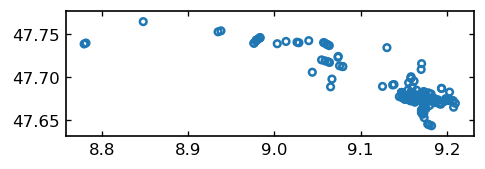

In [ ]:
gdf.plot()

In [237]:
i = 0
while i < len(gdf["region"]):
    if gdf["region"][i] != "Konstanz":
        print(gdf["region"][i])
        i+=1
    else:
        i+=1

 so dass die Sicht häufig versperrt ist.
0
0
0
 die trotz Tauwetter tagelang bleiben.
 die trotz Tauwetter tagelang bleiben.
0
0
0


In [24]:
Tasche = 0 
Lenker = 0
Jackentasche = 0
Hand = 0
Korb = 0
Rucksack = 0
Sonstiges = 0
i = 0
for i in range(0, len(df_ub["pLoc"])-1):
    if df_ub["pLoc"][i] == 0:
        Tasche += 1
        i += 1
    if df_ub["pLoc"][i] == 1:
        Lenker += 1
        i += 1
    if df_ub["pLoc"][i] == 2:
        Jackentasche += 1
        i += 1 
    if df_ub["pLoc"][i] == 3:
        Hand += 1
        i += 1 
    if df_ub["pLoc"][i] == 4:
        Korb += 1
        i += 1
    if df_ub["pLoc"][i] == 5:
        Rucksack += 1
        i += 1
    else:
        Sonstiges += 1
        i += 1

([<matplotlib.axis.XTick at 0x7f1ece3245e0>,
 [Text(0, 0, 'Tasche'),
  Text(1, 0, 'Lenker'),
  Text(2, 0, 'Jackentasche'),
  Text(3, 0, 'Hand'),
  Text(4, 0, 'Korb'),
  Text(5, 0, 'Rucksack'),
  Text(6, 0, 'Sonstiges')])

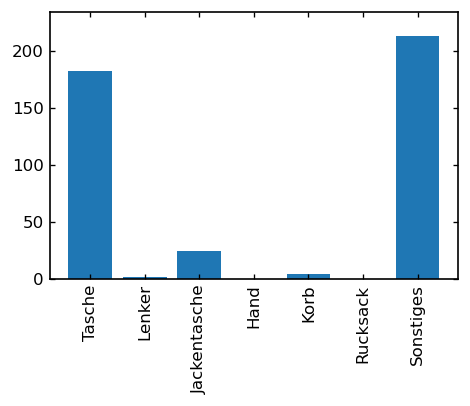

In [33]:
cts_handy = np.array([Tasche, Lenker, Jackentasche, Hand, Korb, Rucksack, Sonstiges])
test = np.array([0,1,2,3,4,5,6])
labels = ["Tasche", "Lenker", "Jackentasche", "Hand", "Korb", "Rucksack", "Sonstiges"]
f, ax = subplots(1,1)
ax.bar(test,cts_handy)
plt.xticks(test, labels, rotation=90)

In [215]:
'''
i1-i10 sind andere (Verkehrs-)Teilnehmer, die an dem Vorfall beteiligt waren. 1, wenn die entsprechende Art von Teilnehmer beteiligt war, sonst 0.
i1 = Bus
i2 = Radfahrer
i3 = Fußgänger
i4 = Lieferwagen
i5 = Lastwagen/LKW
i6 = Motorradfahrer
i7 = PKW
i8 = Taxi
i9 = Sonstiges
i10 = Elektro-Roller

incident: Art des Vorfalls:
-5 = Dummy-Vorfall (wenn kein Vorfall eingestellt ist, wird dieser erstellt, um die Informationen zu bike, pLoc, childCheckBox und trailerCheckBox zu erhalten)
0 = Nichts (Standardwert)
1 = Zu dichtes Überholen
2 = Jemand schert ein oder aus
3 = Beinahe Unfall mit Rechts- oder Linksabbieger
4 = Entgegenkommender Verkehrsteilnehmer
5 = Dicht auffahren (Drängler)
6 = Beinahe-Dooring (plötzlich öffnende Autotür)
7 = Ausweichen vor Hindernis (z.B. Hund)
8 = Sonstiges (bitte angeben)

lat/lon: Breiten- und Längengrad (GPS-Standort)

ts: Zeitstempel (Unix-Zeit; Anzahl der Millisekunden seit dem 1. Januar 1970, 00:00 Uhr UTC) 

bike: Fahrradtyp:
0 = keine Angabe
1 = Stadt-/Trekkingrad
2 = Straßen-Rennrad
3 = E-Bike
4 = Liegefahrrad
5 = Lastenfahrrad
6 = Tandem-Fahrrad
7 = Mountainbike
8 = Sonstiges

childCheckBox: 0, wenn kein Kind auf dem Fahrrad transportiert wird, sonst 1.

trailerCheckBox: 0, wenn kein Kind am Fahrrad angehängt ist, sonst 1.

pLoc: Ort des Smartphones während der Fahrt:
0 = Tasche (Standardwert)
1 = Lenker
2 = Jackentasche
3 = Hand
4 = Korb/Tasche
5 = Rucksack/Tasche
6 = Sonstiges
'''

'\ni1-i10 sind andere (Verkehrs-)Teilnehmer, die an dem Vorfall beteiligt waren. 1, wenn die entsprechende Art von Teilnehmer beteiligt war, sonst 0.\ni1 = Bus\ni2 = Radfahrer\ni3 = Fußgänger\ni4 = Lieferwagen\ni5 = Lastwagen/LKW\ni6 = Motorradfahrer\ni7 = PKW\ni8 = Taxi\ni9 = Sonstiges\ni10 = Elektro-Roller\n\nincident: Art des Vorfalls:\n-5 = Dummy-Vorfall (wenn kein Vorfall eingestellt ist, wird dieser erstellt, um die Informationen zu bike, pLoc, childCheckBox und trailerCheckBox zu erhalten)\n0 = Nichts (Standardwert)\n1 =\xa0Zu dichtes Überholen\n2 = Jemand schert ein oder aus\n3 = Beinahe Unfall mit Rechts- oder Linksabbieger\n4 = Entgegenkommender Verkehrsteilnehmer\n5 = Dicht auffahren (Drängler)\n6 = Beinahe-Dooring (plötzlich öffnende Autotür)\n7 = Ausweichen vor Hindernis (z.B. Hund)\n8 = Sonstiges (bitte angeben)\n\nlat/lon: Breiten- und Längengrad (GPS-Standort)\n\nts: Zeitstempel (Unix-Zeit;\xa0Anzahl der Millisekunden seit dem 1. Januar 1970, 00:00 Uhr UTC)\xa0\n\nbike: